# Algorithmic Trading using Machine Learning

**MS** **in** **Applied** **Data** **Science,** **University** **of** **Southern** **California**

In this Notebook, I will be comparing few signal Indicators for generating Buy and Sell Signals on Historical Close Price.

**PART 2: ALGORITHMIC TRADING STRATEGIES**

In [1]:
#Importing Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Fetching the Stock Data
end=datetime.now()
start=datetime(end.year - 2, end.month, end.day)
stock_data=pdr.DataReader("AAPL", data_source="yahoo",start=start,end=end)
stock_data.shape

(505, 6)

In [3]:
stock_data.describe

<bound method NDFrame.describe of                   High         Low  ...       Volume   Adj Close
Date                                ...                         
2019-05-01   53.827499   52.307499  ...  259309200.0   51.550426
2019-05-02   53.162498   52.032501  ...  127985200.0   51.214951
2019-05-03   52.959999   52.557499  ...   83569600.0   51.851620
2019-05-06   52.209999   50.875000  ...  129772400.0   51.050892
2019-05-07   51.855000   50.207500  ...  155054800.0   49.674709
...                ...         ...  ...          ...         ...
2021-04-26  135.059998  133.559998  ...   66905100.0  134.720001
2021-04-27  135.410004  134.110001  ...   66015800.0  134.389999
2021-04-28  135.020004  133.080002  ...  107760100.0  133.580002
2021-04-29  137.070007  132.449997  ...  151101000.0  133.479996
2021-04-30  133.559998  131.070007  ...  109713200.0  131.460007

[505 rows x 6 columns]>

In [4]:
#Printing the last 5 days stock data
stock_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.720001
2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.389999
2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.580002
2021-04-29,137.070007,132.449997,136.470001,133.479996,151101000.0,133.479996
2021-04-30,133.559998,131.070007,131.779999,131.460007,109713200.0,131.460007


In [5]:
#Printing the First 5 days stock data
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-01,53.827499,52.307499,52.470001,52.630001,259309200.0,51.550426
2019-05-02,53.162498,52.032501,52.459999,52.287498,127985200.0,51.214951
2019-05-03,52.959999,52.557499,52.722500,52.937500,83569600.0,51.851620
2019-05-06,52.209999,50.875000,51.072498,52.119999,129772400.0,51.050892
2019-05-07,51.855000,50.207500,51.470001,50.715000,155054800.0,49.674709


In [6]:
#Reset the index
stock_data.reset_index(inplace=True)

In [7]:
#Set the Date as Index
stock_data=stock_data.set_index(pd.DatetimeIndex(stock_data["Date"].values))

In [8]:
#Stock Data of AAPL
stock_data

,Date,High,Low,Open,Close,Volume,Adj Close
2019-05-01,2019-05-01,53.827499,52.307499,52.470001,52.630001,259309200.0,51.550426
2019-05-02,2019-05-02,53.162498,52.032501,52.459999,52.287498,127985200.0,51.214951
2019-05-03,2019-05-03,52.959999,52.557499,52.722500,52.937500,83569600.0,51.851620
2019-05-06,2019-05-06,52.209999,50.875000,51.072498,52.119999,129772400.0,51.050892
2019-05-07,2019-05-07,51.855000,50.207500,51.470001,50.715000,155054800.0,49.674709
...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.720001
2021-04-27,2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.389999
2021-04-28,2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.580002
2021-04-29,2021-04-29,137.070007,132.449997,136.470001,133.479996,151101000.0,133.479996


**CANDLESTICK CHART**

 The Candlestick Pattern is a movement in prices shown graphically on a candlestick chart that some believe can predict a particular market movement. The recognition of the pattern is subjective and programs that are used for charting have to rely on predefined rules to match the pattern. 

In [9]:
#Create A Candlestick Chart
import plotly.graph_objects as go
figure=go.Figure(
    data=[
           go.Candlestick(
               x= stock_data.index,
               low=stock_data["Low"],
               high=stock_data["High"],
               close=stock_data["Close"],
               open=stock_data["Open"],
               increasing_line_color="green",
               decreasing_line_color="red"
           )
    ]
)
figure.update_layout(
    title="Candlestick Chart",
    yaxis_title="Stock Price ($)",
    xaxis_title="Date"
)
figure.show()

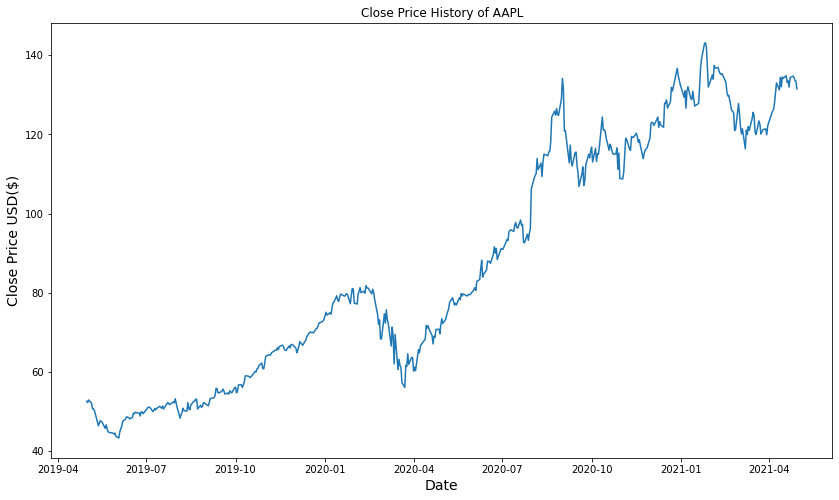

In [37]:
#Plotting the Close Price of the AAPL till today
plt.figure(figsize=(14,8))
plt.title("Close Price History of AAPL")
plt.plot(stock_data["Close"])
plt.xlabel("Date",fontsize=14)
plt.ylabel("Close Price USD($)",fontsize=14)
plt.show()

# **MOVING AVERAGE:**
The Moving Average is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a Moving Mean (MM) or Rolling Mean and is a type of finite impulse response filter. Variations include: simple MA, and cumulative MA, or weighted forms MA.

In [11]:
#Calculate 3 variants of Moving Average
#SHORT EXPONENTIAL MOVING AVERAGE
shortEMA= stock_data.Close.ewm(span=5, adjust=False).mean() #Moving Window 

#MEDIUM EXPONENTIAL MOVING AVERAGE
medEMA= stock_data.Close.ewm(span=21, adjust=False).mean() #Moving Window 

#LONG EXPONENTIAL MOVING AVERAGE
longEMA= stock_data.Close.ewm(span=63, adjust=False).mean() #Moving Window 


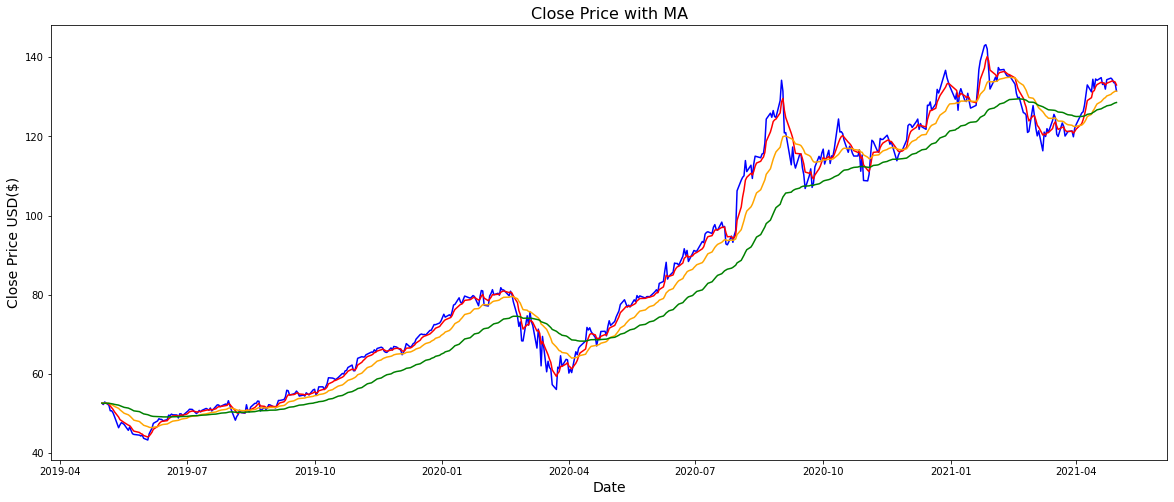

In [12]:
#Visualize the Close Price and Exponential Moving Average
plt.figure(figsize=(20,8))
plt.title("Close Price with MA",fontsize=16)
plt.plot(stock_data["Close"], label="Close Price", color="Blue")
plt.plot(shortEMA, label="Short EMA", color="red")
plt.plot(medEMA, label="Medium EMA", color="orange")
plt.plot(longEMA, label="Long EMA", color="green")

plt.xlabel("Date",fontsize=14)
plt.ylabel("Close Price USD($)",fontsize=14)
plt.show()

In [13]:
#Adding Moving Average values to our original dataset
stock_data["Short EMA"]= shortEMA
stock_data["Medium EMA"]= medEMA
stock_data["Long EMA"]= longEMA

In [14]:
#Updated Dataset
stock_data

,Date,High,Low,Open,Close,Volume,Adj Close,Short EMA,Medium EMA,Long EMA
2019-05-01,2019-05-01,53.827499,52.307499,52.470001,52.630001,259309200.0,51.550426,52.630001,52.630001,52.630001
2019-05-02,2019-05-02,53.162498,52.032501,52.459999,52.287498,127985200.0,51.214951,52.515834,52.598864,52.619298
2019-05-03,2019-05-03,52.959999,52.557499,52.722500,52.937500,83569600.0,51.851620,52.656389,52.629650,52.629242
2019-05-06,2019-05-06,52.209999,50.875000,51.072498,52.119999,129772400.0,51.050892,52.477592,52.583318,52.613328
2019-05-07,2019-05-07,51.855000,50.207500,51.470001,50.715000,155054800.0,49.674709,51.890062,52.413471,52.554005
...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.720001,133.854191,130.612168,127.929073
2021-04-27,2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.389999,134.032794,130.955607,128.130977
2021-04-28,2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.580002,133.881863,131.194189,128.301259
2021-04-29,2021-04-29,137.070007,132.449997,136.470001,133.479996,151101000.0,133.479996,133.747907,131.401989,128.463095


**BUY OR SELL**

In [15]:
#Create a function to generate Buy or Sell Signals
def buy_sell(data):
  buy=[]
  sell=[]
  flag_long=False
  flag_short=False

  for i in range(0, len(data)):
    if data["Medium EMA"][i] < data["Long EMA"][i] and data["Short EMA"][i] < data["Medium EMA"][i] and flag_long==False:
      buy.append(data["Close"][i])
      sell.append(np.nan)
      flag_short=True
    elif flag_short==True and data["Short EMA"][i] > data["Medium EMA"][i]:
      sell.append(data["Close"][i])
      buy.append(np.nan)
      flag_short=False
    elif data["Medium EMA"][i] > data["Long EMA"][i] and data["Short EMA"][i] > data["Medium EMA"][i] and flag_long==False:
      buy.append(data["Close"][i])
      sell.append(np.nan)
      flag_long=True
    elif flag_long==True and data["Short EMA"][i] < data["Medium EMA"][i]:
      sell.append(data["Close"][i])
      buy.append(np.nan)
      flag_long=False
    else:
       buy.append(np.nan)
       sell.append(np.nan)
  return (buy,sell)

In [16]:
#Adding Buy and Sell Signals in original Dataset
stock_data["Buy"]= buy_sell(stock_data)[0]
stock_data["Sell"]= buy_sell(stock_data)[1]

In [17]:
#Updated Stock Data
stock_data

,Date,High,Low,Open,Close,Volume,Adj Close,Short EMA,Medium EMA,Long EMA,Buy,Sell
2019-05-01,2019-05-01,53.827499,52.307499,52.470001,52.630001,259309200.0,51.550426,52.630001,52.630001,52.630001,NaN,NaN
2019-05-02,2019-05-02,53.162498,52.032501,52.459999,52.287498,127985200.0,51.214951,52.515834,52.598864,52.619298,52.287498,NaN
2019-05-03,2019-05-03,52.959999,52.557499,52.722500,52.937500,83569600.0,51.851620,52.656389,52.629650,52.629242,NaN,52.9375
2019-05-06,2019-05-06,52.209999,50.875000,51.072498,52.119999,129772400.0,51.050892,52.477592,52.583318,52.613328,52.119999,NaN
2019-05-07,2019-05-07,51.855000,50.207500,51.470001,50.715000,155054800.0,49.674709,51.890062,52.413471,52.554005,50.715000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.720001,133.854191,130.612168,127.929073,NaN,NaN
2021-04-27,2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.389999,134.032794,130.955607,128.130977,NaN,NaN
2021-04-28,2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.580002,133.881863,131.194189,128.301259,NaN,NaN
2021-04-29,2021-04-29,137.070007,132.449997,136.470001,133.479996,151101000.0,133.479996,133.747907,131.401989,128.463095,NaN,NaN


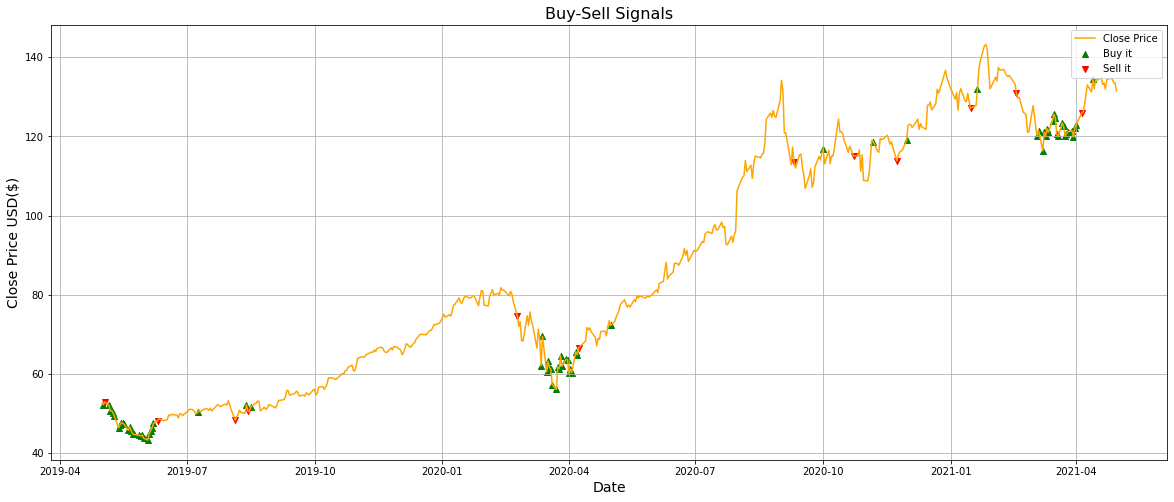

In [18]:
#Visualization of Buy and Sell Signals
plt.figure(figsize=(20,8))
plt.title("Buy-Sell Signals",fontsize=16)
plt.plot(stock_data["Close"], label="Close Price", color="orange")

plt.scatter(stock_data.index, stock_data["Buy"], label='Buy it',color="green", marker="^", alpha=1 )
plt.scatter(stock_data.index, stock_data["Sell"], label='Sell it',color="red", marker="v", alpha=1 )

plt.xlabel("Date",fontsize=14)
plt.ylabel("Close Price USD($)",fontsize=14)
plt.legend(loc='upper right')
plt.grid()
plt.show()

# **MOVING AVERAGE CONVERGENCE/DIVERGENCE:**
The Moving Average Convergence/Divergence indicator is a momentum oscillator primarily used to trade trends. Although it is an oscillator, it is not typically used to identify over bought or oversold conditions. It appears on the chart as two lines which oscillate without boundaries. The crossover of the two lines give trading signals similar to a two moving average system.

In [19]:
#Calculate the MACD and Signal Line Indicators

#SHORT EXPONENTIAL MOVING AVERAGE
shortEMACD= stock_data.Close.ewm(span=12, adjust=False).mean() #Moving Window 
#MEDIUM EXPONENTIAL MOVING AVERAGE
longEMACD= stock_data.Close.ewm(span=26, adjust=False).mean() #Moving Window 

#Calculate MACD
MACD=shortEMACD-longEMACD
#Calculate Signal Indicator
si=MACD.ewm(span=9, adjust=False).mean()

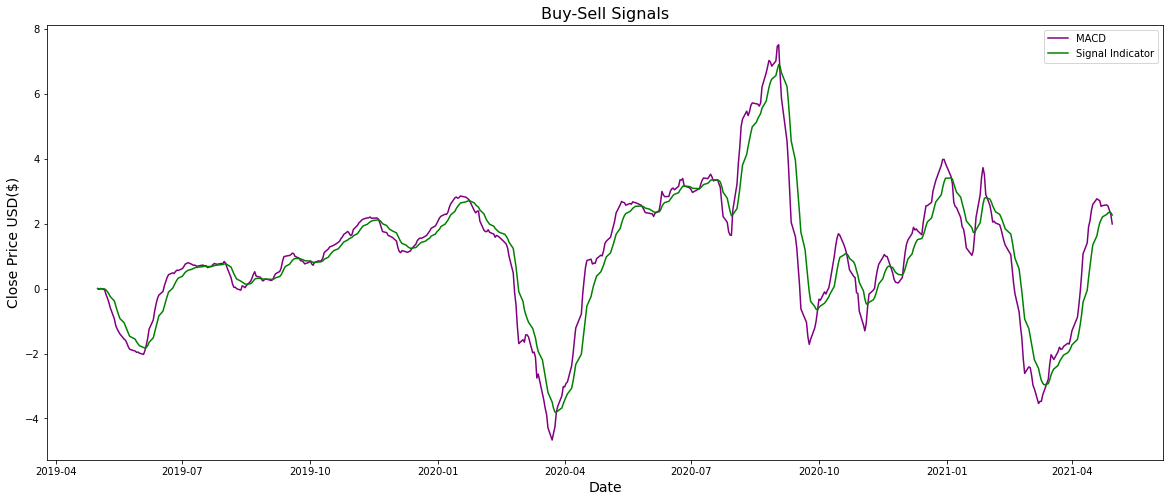

In [20]:
#Visualize the MACD and Signal Indicator
plt.figure(figsize=(20,8))
plt.title("Buy-Sell Signals",fontsize=16)

plt.plot(stock_data.index, MACD, color="purple", label="MACD" )
plt.plot(stock_data.index, si, label="Signal Indicator" ,color="green")
plt.xlabel("Date",fontsize=14)
plt.ylabel("Close Price USD($)",fontsize=14)

plt.legend(loc='upper right')
plt.show()

In [21]:
#Adding MACD and Signal Indicators in original dataset
stock_data["MACD"]=MACD
stock_data["Signal Indicators"]=si

In [22]:
#Updated Stock Data
stock_data

,Date,High,Low,Open,Close,Volume,Adj Close,Short EMA,Medium EMA,Long EMA,Buy,Sell,MACD,Signal Indicators
2019-05-01,2019-05-01,53.827499,52.307499,52.470001,52.630001,259309200.0,51.550426,52.630001,52.630001,52.630001,NaN,NaN,0.000000,0.000000
2019-05-02,2019-05-02,53.162498,52.032501,52.459999,52.287498,127985200.0,51.214951,52.515834,52.598864,52.619298,52.287498,NaN,-0.027322,-0.005464
2019-05-03,2019-05-03,52.959999,52.557499,52.722500,52.937500,83569600.0,51.851620,52.656389,52.629650,52.629242,NaN,52.9375,0.003435,-0.003685
2019-05-06,2019-05-06,52.209999,50.875000,51.072498,52.119999,129772400.0,51.050892,52.477592,52.583318,52.613328,52.119999,NaN,-0.037721,-0.010492
2019-05-07,2019-05-07,51.855000,50.207500,51.470001,50.715000,155054800.0,49.674709,51.890062,52.413471,52.554005,50.715000,NaN,-0.181615,-0.044716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.720001,133.854191,130.612168,127.929073,NaN,NaN,2.576819,2.282504
2021-04-27,2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.389999,134.032794,130.955607,128.130977,NaN,NaN,2.537804,2.333564
2021-04-28,2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.580002,133.881863,131.194189,128.301259,NaN,NaN,2.413700,2.349591
2021-04-29,2021-04-29,137.070007,132.449997,136.470001,133.479996,151101000.0,133.479996,133.747907,131.401989,128.463095,NaN,NaN,2.280984,2.335870


**BUY OR SELL**

In [23]:
#Create a function to indicate Buy or Sell Signals based on MACD and Signal Line
def buy_sell_macd(signal):
  Buy=[]
  Sell=[]
  flag=-1

  for i in range(0, len(signal)):
    if signal["MACD"][i] > signal["Signal Indicators"][i]:
      Sell.append(np.nan)
      if flag!=1:
        Buy.append(signal["Close"][i])
        flag=1
      else:
        Buy.append(np.nan)
    elif signal["MACD"][i] < signal["Signal Indicators"][i]:
      Buy.append(np.nan)
      if flag!=0:
        Sell.append(signal["Close"][i])
        flag=0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return(Buy,Sell)

In [24]:
#Appending Buy Sell result in original dataset
macd_bs= buy_sell_macd(stock_data)
stock_data["Buy_MACD"]=macd_bs[0]
stock_data["Sell_MACD"]=macd_bs[1]

In [25]:
#Updated Stock Data
stock_data

,Date,High,Low,Open,Close,Volume,Adj Close,Short EMA,Medium EMA,Long EMA,Buy,Sell,MACD,Signal Indicators,Buy_MACD,Sell_MACD
2019-05-01,2019-05-01,53.827499,52.307499,52.470001,52.630001,259309200.0,51.550426,52.630001,52.630001,52.630001,NaN,NaN,0.000000,0.000000,NaN,NaN
2019-05-02,2019-05-02,53.162498,52.032501,52.459999,52.287498,127985200.0,51.214951,52.515834,52.598864,52.619298,52.287498,NaN,-0.027322,-0.005464,NaN,52.287498
2019-05-03,2019-05-03,52.959999,52.557499,52.722500,52.937500,83569600.0,51.851620,52.656389,52.629650,52.629242,NaN,52.9375,0.003435,-0.003685,52.9375,NaN
2019-05-06,2019-05-06,52.209999,50.875000,51.072498,52.119999,129772400.0,51.050892,52.477592,52.583318,52.613328,52.119999,NaN,-0.037721,-0.010492,NaN,52.119999
2019-05-07,2019-05-07,51.855000,50.207500,51.470001,50.715000,155054800.0,49.674709,51.890062,52.413471,52.554005,50.715000,NaN,-0.181615,-0.044716,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.720001,133.854191,130.612168,127.929073,NaN,NaN,2.576819,2.282504,NaN,NaN
2021-04-27,2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.389999,134.032794,130.955607,128.130977,NaN,NaN,2.537804,2.333564,NaN,NaN
2021-04-28,2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.580002,133.881863,131.194189,128.301259,NaN,NaN,2.413700,2.349591,NaN,NaN
2021-04-29,2021-04-29,137.070007,132.449997,136.470001,133.479996,151101000.0,133.479996,133.747907,131.401989,128.463095,NaN,NaN,2.280984,2.335870,NaN,133.479996


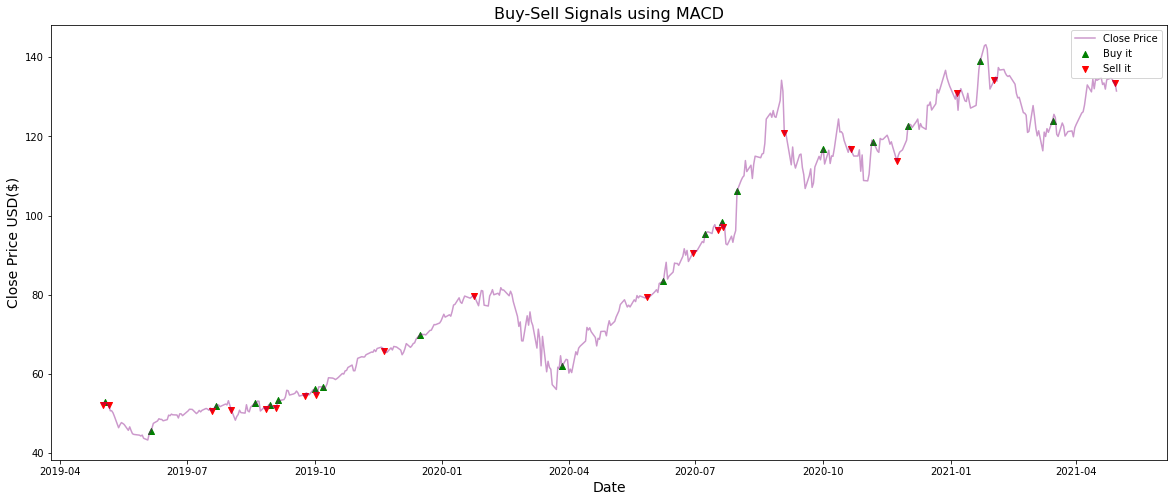

In [26]:
#Visualization of Buy and Sell Signals
plt.figure(figsize=(20,8))
plt.title("Buy-Sell Signals using MACD",fontsize=16)
plt.plot(stock_data["Close"], label="Close Price", color="purple", alpha=0.4)

plt.scatter(stock_data.index,  stock_data["Buy_MACD"], label='Buy it',color="green", marker="^", alpha=1 )
plt.scatter(stock_data.index, stock_data["Sell_MACD"], label='Sell it', color="red", marker="v", alpha=1)

plt.xlabel("Date",fontsize=14)
plt.ylabel("Close Price USD($)",fontsize=14)
plt.legend(loc='upper right')
plt.show()

# **MONEY FLOW INDEX:**
The Money Flow Index (MFI) is a technical oscillator that uses price and volume data for identifying overbought or oversold signals in an asset. It can also be used to spot divergences which warn of a trend change in price. The oscillator moves between 0 and 100.

In [27]:
#Calculate the Typical Price of Stocks
typical_price= (stock_data["High"] + stock_data["Low"] + stock_data["Close"])/3
print("Typical Price:",typical_price)

Typical Price: 2019-05-01     52.921666
2019-05-02     52.494166
2019-05-03     52.818333
2019-05-06     51.734999
2019-05-07     50.925833
                 ...    
2021-04-26    134.446665
2021-04-27    134.636668
2021-04-28    133.893336
2021-04-29    134.333333
2021-04-30    132.030004
Length: 505, dtype: float64


In [28]:
#Setting Period of 14 days as MFI generally uses 14 days of period.
period=14

#Calculate MFI
moneyflow= typical_price*stock_data["Volume"]

#Positive and Negative MFI
pos_mfi=[]
neg_mfi=[]

for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]:
    pos_mfi.append(moneyflow[i-1])
    neg_mfi.append(0)
  elif typical_price[i] < typical_price[i-1]:
    neg_mfi.append(moneyflow[i-1])
    pos_mfi.append(0)
  else:
    pos_mfi.append(0)
    neg_mfi.append(0)

In [29]:
#Fetch all Positive & Negative MFI Within 14 days time period
pos_mf=[]
neg_mf=[]

for i in range(period-1, len(pos_mfi)):
  pos_mf.append(sum(pos_mfi[i+1-period : i+1]))
for i in range(period-1, len(neg_mfi)):
  neg_mf.append(sum(neg_mfi[i+1-period : i+1]))

In [30]:
#Calculate the MFI
MFI= 100 * (np.array(pos_mf) / (np.array(pos_mf) + np.array(neg_mf)))
MFI

array([35.63127044, 38.8430698 , 32.09353695, 38.30284567, 39.32159954,
       40.599476  , 46.43007212, 48.16119807, 50.10864388, 47.78589774,
       46.87207093, 47.15471646, 53.98442711, 62.00154957, 60.97125045,
       61.00587236, 67.63086399, 60.40639969, 66.27658437, 72.74275679,
       72.82463475, 78.65887257, 79.21839085, 66.11316381, 59.73109476,
       58.93178183, 59.57720518, 52.12241526, 52.91920404, 61.01930666,
       60.94701228, 66.35829146, 60.82666594, 62.1390173 , 61.48357027,
       55.54250149, 62.05233291, 74.45617572, 74.64812216, 68.3648995 ,
       67.04019837, 67.50764703, 66.34647409, 65.75246459, 58.74205058,
       53.51901916, 59.63476563, 58.5366703 , 50.10131052, 59.789722  ,
       43.80757502, 34.33143691, 32.21218417, 41.60450188, 44.31214312,
       50.10210153, 44.90938563, 39.85628685, 44.32912753, 41.41647368,
       36.90509108, 37.98037493, 42.80193142, 41.76899873, 51.52580299,
       55.39184847, 57.67994335, 57.38680826, 50.23816936, 43.13

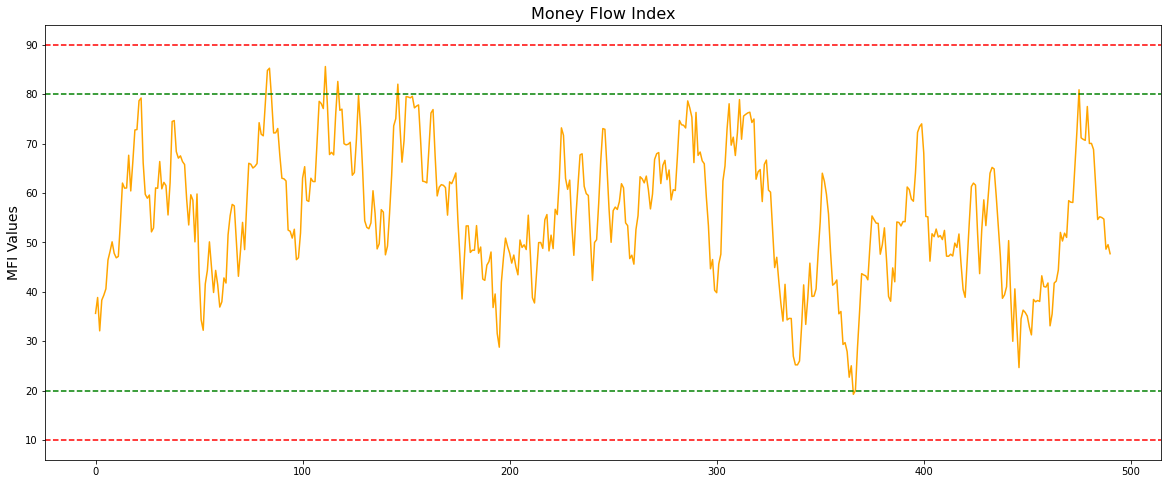

In [31]:
#Visualization of MFI
mfi_df=pd.DataFrame()
mfi_df["MFI"]=MFI

#Create the plot
plt.figure(figsize=(20,8))
plt.title("Money Flow Index",fontsize=16)
plt.plot(mfi_df["MFI"], label="MFI", color="orange")

plt.axhline(10, linestyle="--", color="red")
plt.axhline(20, linestyle="--", color="green")
plt.axhline(80, linestyle="--", color="green")
plt.axhline(90, linestyle="--", color="red")

plt.ylabel("MFI Values",fontsize=14)
plt.show()

In [32]:
#Appending the dataset to Original data
stock_data1=pd.DataFrame()
stock_data1=stock_data[period:]
stock_data1["MFI"]=MFI

**BUY OR SELL**

In [33]:
#Create a function to generate Buy or Sell Signals
def get_buysell(data,high,low):
  buy_MFI=[]
  sell_MFI=[]

  for i in range(0, len(data["MFI"])):
    if data["MFI"][i] > high:
      buy_MFI.append(np.nan)
      sell_MFI.append(data["Close"][i])
    elif data["MFI"][i] < low:
      buy_MFI.append(data["Close"][i])
      sell_MFI.append(np.nan)
    else:
      buy_MFI.append(np.nan)
      sell_MFI.append(np.nan)
  return (buy_MFI, sell_MFI)

In [34]:
#Adding Buy or Sell Signal to original data
stock_data1["Buy_MFI"]=get_buysell(stock_data1,80,20)[0] #Overbought Values
stock_data1["Sell_MFI"]=get_buysell(stock_data1,80,20)[1] #Oversold Values

In [35]:
#Updated Data
stock_data1

,Date,High,Low,Open,Close,Volume,Adj Close,Short EMA,Medium EMA,Long EMA,Buy,Sell,MACD,Signal Indicators,Buy_MACD,Sell_MACD,MFI,Buy_MFI,Sell_MFI
2019-05-21,2019-05-21,47.000000,46.174999,46.305000,46.650002,113459200.0,45.869057,46.940812,49.419095,51.248945,46.650002,NaN,-1.591769,-1.158297,NaN,NaN,35.631270,NaN,NaN
2019-05-22,2019-05-22,46.427502,45.637501,46.165001,45.695000,118994400.0,44.930046,46.525541,49.080541,51.075385,45.695000,NaN,-1.678165,-1.262271,NaN,NaN,38.843070,NaN,NaN
2019-05-23,2019-05-23,45.134998,44.452499,44.950001,44.915001,146118800.0,44.163101,45.988695,48.701855,50.882873,44.915001,NaN,-1.788952,-1.367607,NaN,NaN,32.093537,NaN,NaN
2019-05-24,2019-05-24,45.535000,44.654999,45.049999,44.742500,94858800.0,43.993488,45.573296,48.341914,50.690986,44.742500,NaN,-1.869124,-1.467910,NaN,NaN,38.302846,NaN,NaN
2019-05-28,2019-05-28,45.147499,44.477501,44.730000,44.557499,111792800.0,43.811584,45.234697,47.997876,50.499315,44.557499,NaN,-1.925395,-1.559407,NaN,NaN,39.321600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.720001,133.854191,130.612168,127.929073,NaN,NaN,2.576819,2.282504,NaN,NaN,55.022681,NaN,NaN
2021-04-27,2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.389999,134.032794,130.955607,128.130977,NaN,NaN,2.537804,2.333564,NaN,NaN,54.705371,NaN,NaN
2021-04-28,2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.580002,133.881863,131.194189,128.301259,NaN,NaN,2.413700,2.349591,NaN,NaN,48.622921,NaN,NaN
2021-04-29,2021-04-29,137.070007,132.449997,136.470001,133.479996,151101000.0,133.479996,133.747907,131.401989,128.463095,NaN,NaN,2.280984,2.335870,NaN,133.479996,49.544002,NaN,NaN


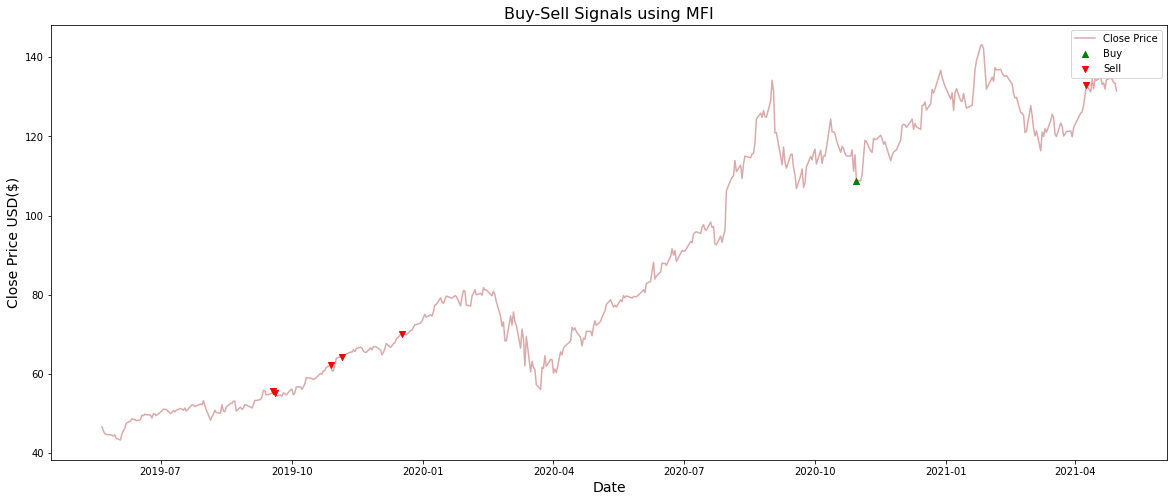

In [36]:
#Visualize the Buy Sell Signals
plt.figure(figsize=(20,8))
plt.title("Buy-Sell Signals using MFI",fontsize=16)
plt.plot(stock_data1["Close"], label="Close Price", color="brown", alpha=0.4)

plt.scatter(stock_data1.index,  stock_data1["Buy_MFI"], label='Buy',color="green", marker="^", alpha=1 )
plt.scatter(stock_data1.index, stock_data1["Sell_MFI"], label='Sell', color="red", marker="v", alpha=1)

plt.xlabel("Date",fontsize=14)
plt.ylabel("Close Price USD($)",fontsize=14)
plt.legend(loc='upper right')
plt.show()